In [1]:
import sys

In [2]:
sys.path.append('/Users/chadestep/GitHub/surmeierlab/neurphys/')

In [3]:
import neurphys as nu
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import numpy as np
import pandas as pd
%matplotlib inline

# FOR THIS TO WORK YOU MUST USE MY STYLESHEET
mpl.style.use('estep_style')

/Users/chadestep/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Make some data

In [4]:
# Signal data
np.random.seed(0)
noise   = (np.random.randn(1000))
x       = np.linspace(0,100,1000)
signal1 = np.array(np.pi*10*np.sin(x)+5*noise)
signal2 = np.array(np.pi*15*np.cos(x)+noise)

In [5]:
# Box and scatter plot data
binomial    = pd.Series(np.random.binomial(100,0.7,80),name='binomial')
exponential = pd.Series(np.random.exponential(5,90),name='exponenetial')
normal      = pd.Series(np.random.normal(40,20,100),name='normal')
rayleigh    = pd.Series(np.random.rayleigh(10, 70),name='rayleigh')
random1     = pd.Series(abs(np.random.randn(50))*10,name='random1')
random2     = pd.Series(abs(np.random.randn(200))*20,name='random2')
df_boxplot = pd.concat([binomial,exponential,normal,rayleigh,random1,random2],axis=1)
df_boxplot.head(5)

,binomial,exponenetial,normal,rayleigh,random1,random2
0,78,12.577097,50.046565,5.743346,1.474344,19.976976
1,69,2.651966,22.754660,17.508559,9.774649,14.802736
2,72,1.821138,43.213224,16.506574,8.793899,11.309956
3,77,14.328984,20.947101,26.125339,6.354245,9.520628
4,75,23.362800,72.170443,20.387159,5.426108,43.161371


In [6]:
# Raster data
nbins, sweeps = 100, 10
series_list = []
for i in range(sweeps):
    series_list.append(pd.Series(np.arange(nbins)[np.random.rand(nbins)<0.25],
                                 name='sweep{0}'.format(i+1)))
df_raster = pd.concat(series_list,axis=1)
df_raster.head(5)

,sweep1,sweep2,sweep3,sweep4,sweep5,sweep6,sweep7,sweep8,sweep9,sweep10
0,7,0,2,2,0,2,6,1,1,5
1,11,9,4,8,12,8,12,6,3,8
2,18,11,5,17,16,9,15,7,4,11
3,21,15,9,23,27,10,18,9,6,12
4,22,17,11,25,33,11,27,10,11,18


# Find styles directory and add 'estep_style.mplstyle' to that directory

First, [download this file](https://github.com/chadestep/playing_with_python/raw/master/other/estep_style.mplstyle)

Second, run the next cell.

In [7]:
# find the correct directory to put your new file
print(mpl.matplotlib_fname()[:-12]) # directory name

/Users/chadestep/anaconda/lib/python3.4/site-packages/matplotlib/mpl-data/


Third, place the file you downloaded into that directory

Finally, run the next cell.

In [8]:
mpl.style.use('estep_style')

---
# <center>Now you can use my functions to make figures</center>
---

## Let's begin with simple_axis/figure, clean_axis/figure, and nu_legend  (they act as a general functional unit)

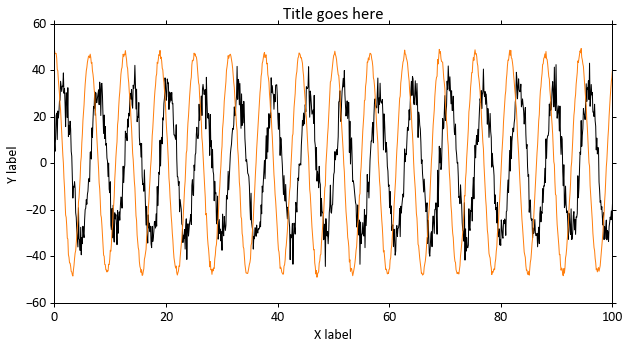

In [9]:
f, ax = plt.subplots() 
ax.plot(x,signal1)      # make the first plot
ax.plot(x,signal2)      # make the second plot on the same axes (overlay plots)
ax.set_title('Title goes here')
ax.set_ylabel('Y label')
ax.set_xlabel('X label')
plt.show()

# Let's start with: simple_axis and simple_figure

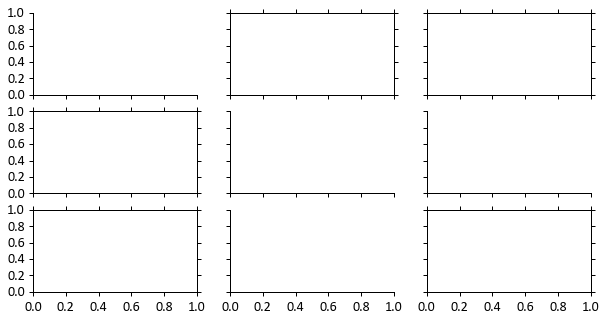

In [10]:
# Use simple_axis to clean up the ticks and axis' of specific subplots

f, ax = plt.subplots(3,3, sharex=True, sharey=True)
nu.simple_axis(ax[0,0])
nu.simple_axis(ax[1,1])
nu.simple_axis(ax[1,2])
nu.simple_axis(ax[2,1])
plt.show()

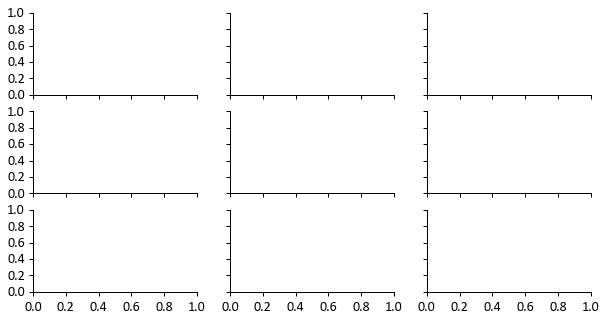

In [11]:
# if you want to get rid of all of them in one fell swoop

f, ax = plt.subplots(3,3, sharex=True, sharey=True)
nu.simple_figure(f)
plt.show()

# clean_axis and clean_figure

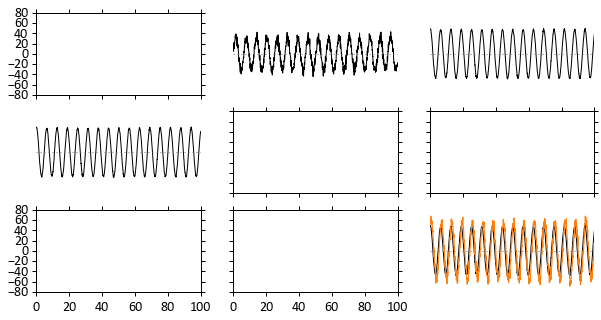

In [12]:
# Use clean_axis to clean up the ticks and axis' of specific subplots

f, ax = plt.subplots(3,3, sharex=True, sharey=True)
ax[0,1].plot(x,signal1)
ax[0,2].plot(x,signal2)
ax[1,0].plot(x,signal2)
ax[2,2].plot(x,signal2)
ax[2,2].plot(x,signal1+signal2)

nu.clean_axis(ax[0,1],y_units='mV',baseline=0)
nu.clean_axis(ax[0,2],y_units='mV',baseline=0)
nu.clean_axis(ax[1,0],y_units='mV',baseline=0)
nu.clean_axis(ax[2,2],y_units='mV',baseline=0)
plt.show()

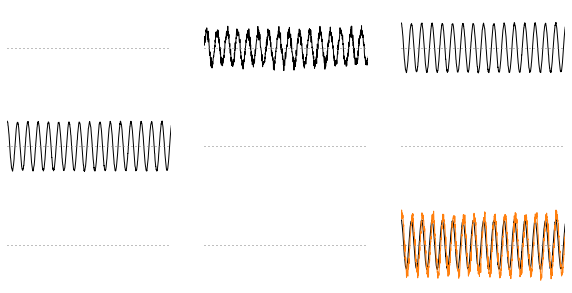

In [13]:
f, ax = plt.subplots(3,3, sharex=True, sharey=True)
ax[0,1].plot(x,signal1)
ax[0,2].plot(x,signal2)
ax[1,0].plot(x,signal2)
ax[2,2].plot(x,signal2)
ax[2,2].plot(x,signal1+signal2)

nu.clean_figure(f,y_units='mV',baseline=0)
plt.show()

# Add a legend and scalebars to simplified or cleaned figure
NOTE: you do have to make sure sharex and sharey are set to True

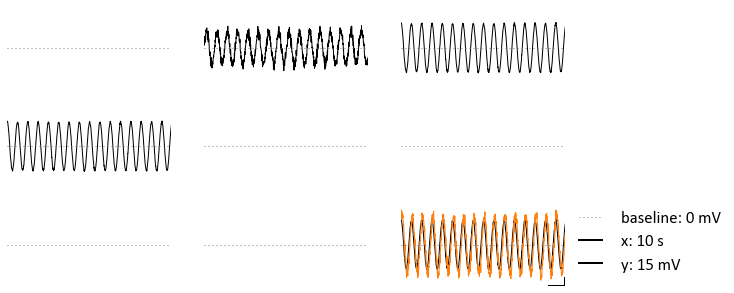

In [14]:
f, ax = plt.subplots(3,3, sharex=True, sharey=True)
ax[0,1].plot(x,signal1)
ax[0,2].plot(x,signal2)
ax[1,0].plot(x,signal2)
ax[2,2].plot(x,signal2)
ax[2,2].plot(x,signal1+signal2)

nu.clean_figure(f,y_units='mV',baseline=0)
nu.nu_legend(f,10,'s',15,'mV')
plt.show()

# Moving on to the plotting functions

# Boxplots

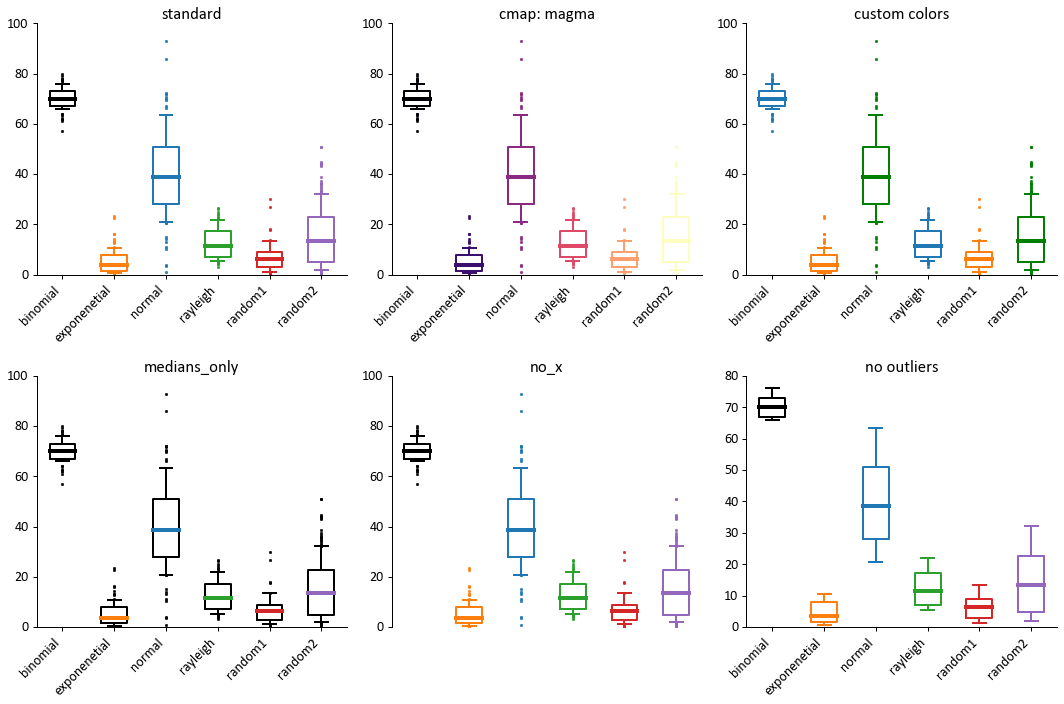

In [15]:
f, ax = plt.subplots(2,3,figsize=(15,10))

nu.nu_boxplot(ax[0,0],df_boxplot)
nu.nu_boxplot(ax[0,1],df_boxplot,cmap='magma')
nu.nu_boxplot(ax[0,2],df_boxplot,color_list=['#1f77b4','#ff7f0e','green'])
nu.nu_boxplot(ax[1,0],df_boxplot,medians_only=True)
nu.nu_boxplot(ax[1,1],df_boxplot,no_x=True)
nu.nu_boxplot(ax[1,2],df_boxplot,show_outliers=False)

titles = ['standard','cmap: magma','custom colors','medians_only','no_x','no outliers']
for i,ax in enumerate(f.axes):
    ax.set_title(titles[i])
plt.tight_layout()
plt.show()

# Columnar scatter plots

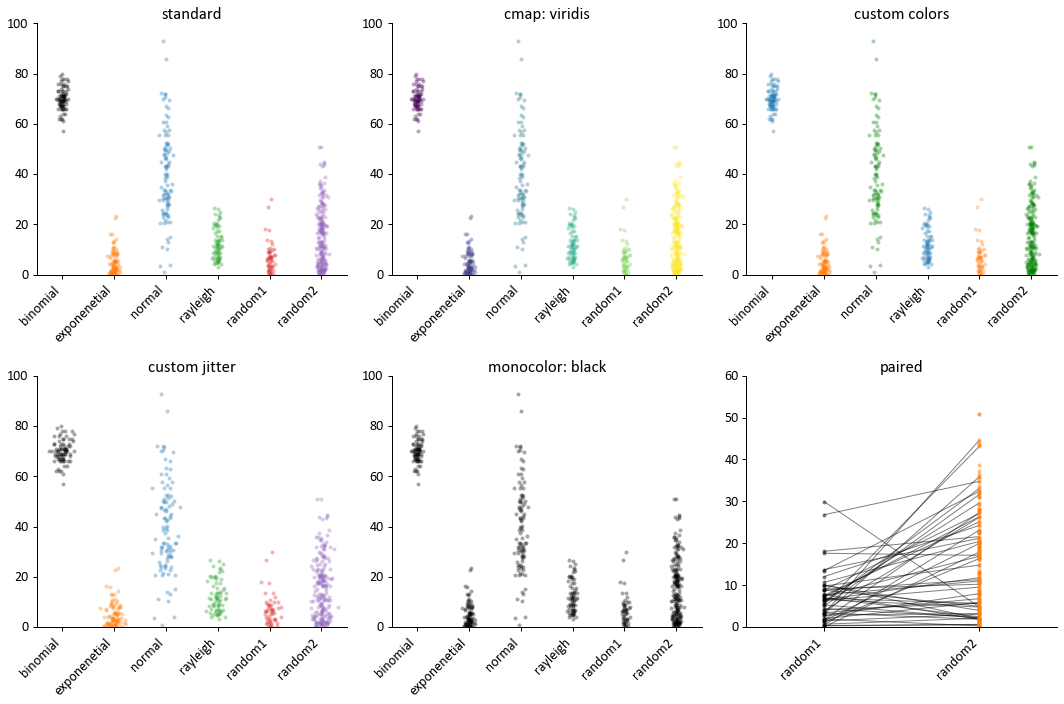

In [16]:
f, ax = plt.subplots(2,3,figsize=(15,10))

nu.nu_scatter(ax[0,0],df_boxplot)
nu.nu_scatter(ax[0,1],df_boxplot,cmap='viridis')
nu.nu_scatter(ax[0,2],df_boxplot,color_list=['#1f77b4','#ff7f0e','green'])
nu.nu_scatter(ax[1,0],df_boxplot,jitter=0.10)
nu.nu_scatter(ax[1,1],df_boxplot,monocolor='000000')
nu.nu_scatter(ax[1,2],df_boxplot[['random1','random2']],paired=True,jitter=0,alpha=0.5)

titles = ['standard','cmap: viridis','custom colors','custom jitter','monocolor: black','paired']
for i,ax in enumerate(f.axes):
    ax.set_title(titles[i])
plt.tight_layout()
plt.show()

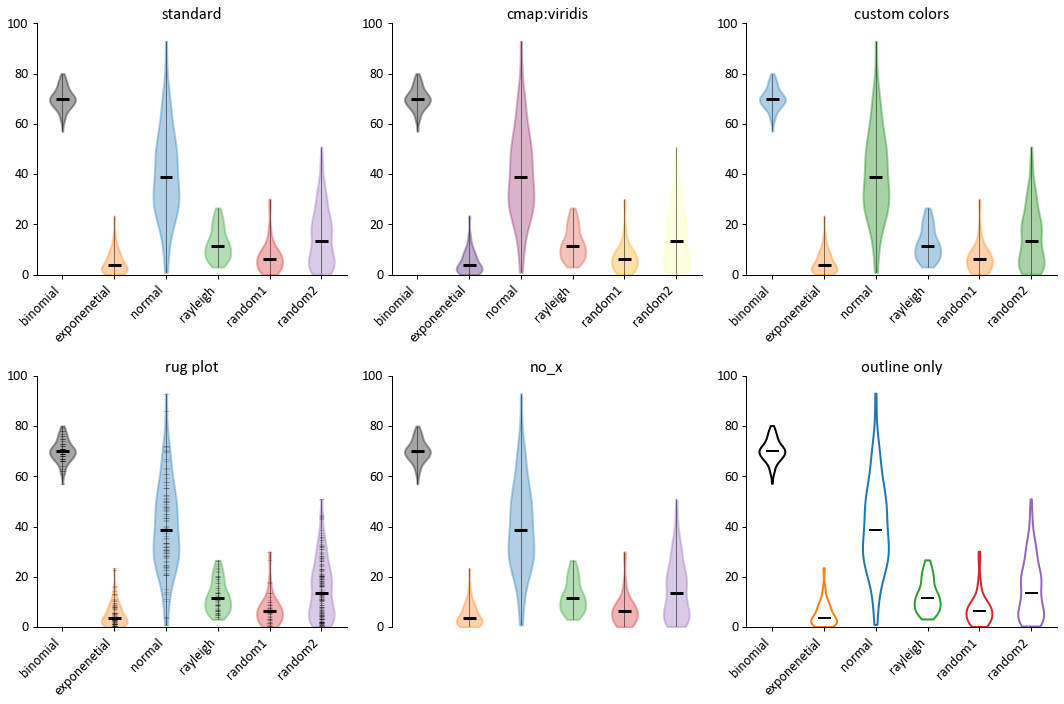

In [17]:
f, ax = plt.subplots(2,3,figsize=(15,10))

nu.nu_violin(ax[0,0],df_boxplot)
nu.nu_violin(ax[0,1],df_boxplot,cmap='inferno')
nu.nu_violin(ax[0,2],df_boxplot,color_list=['#1f77b4','#ff7f0e','green'])
nu.nu_violin(ax[1,0],df_boxplot,rug=True)
nu.nu_violin(ax[1,1],df_boxplot,no_x=True)
nu.nu_violin(ax[1,2],df_boxplot,outline_only=True)

titles = ['standard','cmap:viridis','custom colors','rug plot','no_x','outline only']
for i,ax in enumerate(f.axes):
    ax.set_title(titles[i])
plt.tight_layout()
plt.show()